## Data Loader Test

In [1]:
from os import listdir
from os.path import isfile, join
import torch; torch.manual_seed(0)
from torchvision import transforms, utils
from data_loader import ProgressionDataLoader
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
csv_path = 'E:\work\dataset\progress_subset.csv'
img_path = 'E:\work\dataset\cropped_256'

ResizeParam = 128
batch_size = 72
FD = ProgressionDataLoader(csv_path, img_path,transform=transforms.Compose([transforms.Resize(ResizeParam), transforms.ToTensor()]))
data_loader = torch.utils.data.DataLoader(FD, batch_size = batch_size)

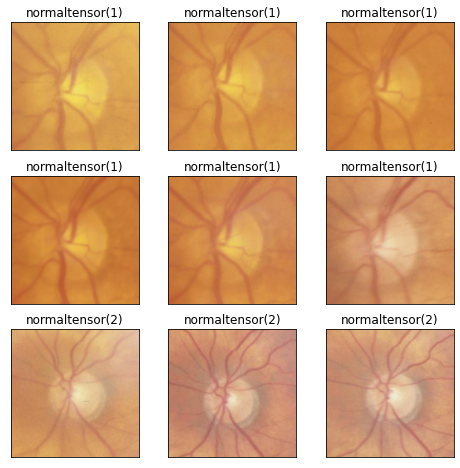

In [3]:
#Utility functions to un-normalize and display an image
def imshow(img):
    #img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

 
#Define the image classes
classes = ['normal','glaucoma','suspect']

#Obtain one batch of training images
dataiter = iter(data_loader)
images, labels, time, indexx = dataiter.next()
images = images.numpy() # convert images to numpy for display

#Plot the images
fig = plt.figure(figsize=(8, 8))
# display 20 images
for idx in np.arange(9):
    ax = fig.add_subplot(3, 3, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]] + str(indexx[idx]))

In [10]:
indexx[labels == 1]

tensor([5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [5]:
images1, labels1, time1, indexx1 = dataiter.next()

In [15]:
np.where(labels == 1)[0]

tensor([5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

### Data Analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/home/vip/sayan-mandal/datasets/obj_criteria/20200619-objective.csv', low_memory = False)

df_subjective = pd.read_csv('/home/vip/sayan-mandal/datasets/obj_criteria/20200623-images_with_subjective.csv')
df_subjective = df_subjective[['maskedid']].drop_duplicates().reset_index(drop = True)
df_subjective['with_subjective'] = 1

df = df.join(df_subjective.set_index('maskedid'), on = 'maskedid')
df = df.loc[df.with_subjective.isnull() == True].reset_index(drop = True)
df = df.loc[df.classification2 != 'suspect']


In [3]:
df.columns

Index(['file_jpg', 'maskedid', 'eye', 'date', 'imageid', 'octdate', 'dob',
       'age', 'quality', 'rnflmean_g',
       ...
       'series', 'phototype', 'photodate', 'phototime', 'camera',
       'homonymous_nidek', 'dcm_filename', 'studytime', 'seriestime',
       'with_subjective'],
      dtype='object', length=108)

In [7]:
df.iloc[0]["file_jpg"]

'NY7624_2010_07_23_OS_02.JPG'

In [4]:
df.classification2.value_counts()

glaucoma    4657
normal      3970
Name: classification2, dtype: int64

In [8]:
import torch.nn as nn
import torch
from torch.autograd import Variable

In [4]:
lol = torch.Tensor([[1,-1],[-1,1]])

In [40]:
Variable(lol.data.new(lol.size())).normal_().sum()

tensor(2.8768)

In [23]:
lol.data.new(lol.size())

tensor([[4.7994e-36, 0.0000e+00],
        [4.4941e-36, 0.0000e+00]])

In [35]:
Variable(torch.randn(*lol.size())).sum()

tensor(2.3365)